# FINAL PROJECT
*Adelshiyev Syrym, Zhaksybek Ayazhan*

# WORK WITH EMOTIONS DATASET
*At this stage of work, we are working with a photo model and predictions
We chose specific 4 emotions, these are anger, sadness, happiness and neutral. And in each of these classes, we put 200 photos per class (100 photos go to train, 100 to validation)*

In [3]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [2]:
from socket import socket
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import IPython.display as display
import cv2
from tqdm import tqdm


from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.utils import to_categorical, plot_model


In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 48
SHUFFLE_SIZE = 1000
picture_size = 48

In [5]:
import shutil
import pathlib

import keras
keras.__version__

'2.11.0'

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
base = '/content/drive/MyDrive/fer-2013/'
print(os.listdir(base))
base_root = pathlib.Path(base)

train_dir = '/content/drive/MyDrive/fer-2013/train/'
print(os.listdir(train_dir))
train_root = pathlib.Path(train_dir)

validation_dir = '/content/drive/MyDrive/fer-2013/validation/'
print(os.listdir(validation_dir))
validation_root = pathlib.Path(validation_dir)

['train', 'validation']
['neutral', 'sad', 'angry', 'happy']
['neutral', 'happy', 'sad', 'angry']


In [8]:
train_angry = '/content/drive/MyDrive/fer-2013/train/angry'
train_sad = '/content/drive/MyDrive/fer-2013/train/sad'
train_happy = '/content/drive/MyDrive/fer-2013/train/happy'
train_neutral = '/content/drive/MyDrive/fer-2013/train/neutral'

validation_angry = '/content/drive/MyDrive/fer-2013/validation/angry'
validation_sad = '/content/drive/MyDrive/fer-2013/validation/sad'
validation_happy = '/content/drive/MyDrive/fer-2013/validation/happy'
validation_neutral = '/content/drive/MyDrive/fer-2013/validation/neutral'

In [9]:
emotions = ['angry', 'sad', 'neutral', 'happy']

In [10]:
all_image_paths = list(base_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

train_images_paths = list(train_root.glob('*/*')) 
train_images_paths = [str(path) for path in train_images_paths] 
random.shuffle(train_images_paths) 
 
validation_images_paths = list(validation_root.glob('*/*')) 
validation_images_paths = [str(path) for path in validation_images_paths] 
random.shuffle(validation_images_paths)

image_count = len(all_image_paths)
image_count

8

In [11]:
all_image_paths[:8]

['/content/drive/MyDrive/fer-2013/train/neutral',
 '/content/drive/MyDrive/fer-2013/validation/angry',
 '/content/drive/MyDrive/fer-2013/train/happy',
 '/content/drive/MyDrive/fer-2013/train/angry',
 '/content/drive/MyDrive/fer-2013/train/sad',
 '/content/drive/MyDrive/fer-2013/validation/sad',
 '/content/drive/MyDrive/fer-2013/validation/happy',
 '/content/drive/MyDrive/fer-2013/validation/neutral']

In [12]:
for num in os.listdir(train_dir):
    print('Train: ' + str(len(os.listdir(train_dir + '/' + num))) + " " + num + " " + "images")

for num2 in os.listdir(validation_dir):
    print('Validation: ' + str(len(os.listdir(validation_dir + '/' + num2))) + " " + num2 + " " + "images")

Train: 100 neutral images
Train: 100 sad images
Train: 100 angry images
Train: 100 happy images
Validation: 100 neutral images
Validation: 100 happy images
Validation: 100 sad images
Validation: 100 angry images


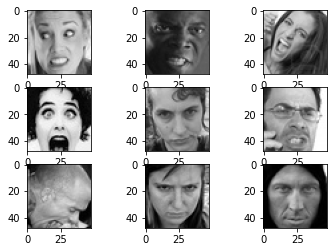

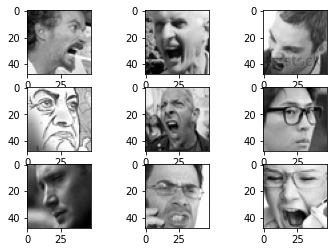

In [13]:
mood = 'angry'

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "train/" + mood + "/"+ os.listdir(base + "train/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "validation/" + mood + "/"+ os.listdir(base + "validation/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

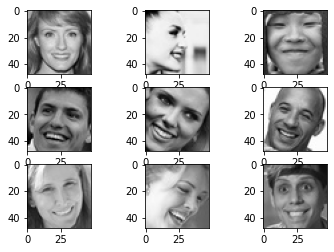

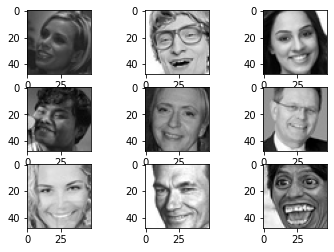

In [14]:
mood = 'happy'

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "train/" + mood + "/"+ os.listdir(base + "train/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "validation/" + mood + "/"+ os.listdir(base + "validation/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

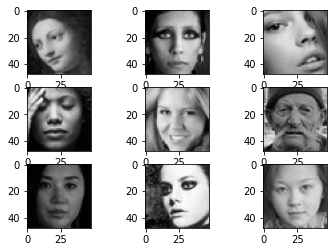

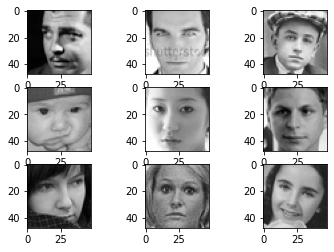

In [15]:
mood = 'neutral'

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "train/" + mood + "/"+ os.listdir(base + "train/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "validation/" + mood + "/"+ os.listdir(base + "validation/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

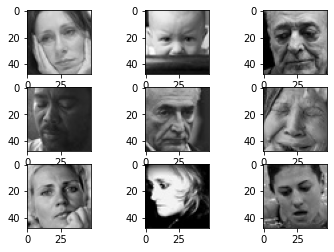

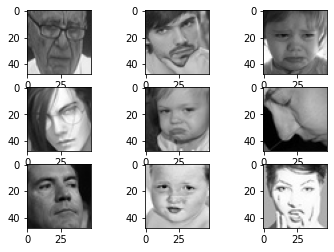

In [16]:
mood = 'sad'

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "train/" + mood + "/"+ os.listdir(base + "train/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(base + "validation/" + mood + "/"+ os.listdir(base + "validation/" + mood)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255) 

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

train_generator = test_datagen.flow_from_directory( 
        train_dir, 
        target_size=(IMG_SIZE, IMG_SIZE), 
        batch_size= BATCH_SIZE, 
        class_mode='binary') 
 
validation_generator = test_datagen.flow_from_directory( 
        validation_dir, 
        target_size=(IMG_SIZE, IMG_SIZE), 
        batch_size=BATCH_SIZE, 
        class_mode='binary')

Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [73]:
model= tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256,(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512,activation = 'relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization_47 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 dropout_61 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_99 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 11, 11, 64)     

In [75]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 48, 48, 3)
labels batch shape: (64,)


Epoch 1/5
7/7 [==============================] - 8s 910ms/step - loss: 1.6495 - accuracy: 0.2300 - val_loss: 1.8006 - val_accuracy: 0.2525
Epoch 2/5
7/7 [==============================] - 4s 572ms/step - loss: 1.4094 - accuracy: 0.2850 - val_loss: 1.7140 - val_accuracy: 0.2500
Epoch 3/5
7/7 [==============================] - 4s 564ms/step - loss: 1.4366 - accuracy: 0.3075 - val_loss: 1.6056 - val_accuracy: 0.2550
Epoch 4/5
7/7 [==============================] - 5s 780ms/step - loss: 1.3721 - accuracy: 0.3350 - val_loss: 1.5442 - val_accuracy: 0.2500
Epoch 5/5
7/7 [==============================] - 4s 552ms/step - loss: 1.3311 - accuracy: 0.3600 - val_loss: 1.5115 - val_accuracy: 0.2250


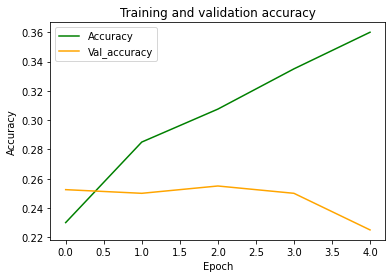

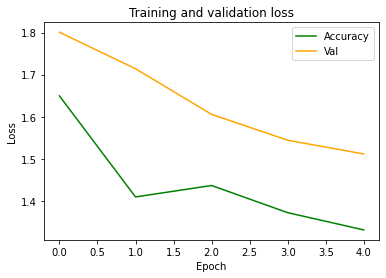

In [76]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

def plot(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='green', label='Accuracy')
  plt.plot(epochs, val_acc, color='orange', label='Val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='green', label='Accuracy')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
plot(history)

In [39]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

7/7 [==============================] - 1s 119ms/step - loss: 1.5293 - accuracy: 0.2400
final train accuracy = 26.00 , validation accuracy = 24.00


In [40]:
labels_index = dict((name, index) for index, name in enumerate(emotions)) # Indices of labels 
 
train_images_labels = [labels_index[pathlib.Path(path).parent.name] 
                    for path in train_images_paths] 
 
validation_images_labels = [labels_index[pathlib.Path(path).parent.name] 
                            for path in validation_images_paths]
print(labels_index)

{'angry': 0, 'sad': 1, 'neutral': 2, 'happy': 3}


In [41]:
def load_and_preprocess_image(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  img /= 255.0  # normalize pixels to 0,1
  return img

In [77]:
index = 4 
 
for i in range(index): 
  img = load_and_preprocess_image(train_images_paths[i]) 
  im_batch = tf.expand_dims(img, axis=0) 
  batch_prediction = model.predict(im_batch) 
  pred = batch_prediction[0] 
 
  print("Prediction", emotions[tf.argmax(pred)]) 
  print("Actual", emotions[train_images_labels[i]], '\n')

1/1 [==============================] - 0s 202ms/step
Prediction sad
Actual sad 

1/1 [==============================] - 0s 34ms/step
Prediction sad
Actual happy 

1/1 [==============================] - 0s 46ms/step
Prediction angry
Actual sad 

1/1 [==============================] - 0s 52ms/step
Prediction angry
Actual neutral 



In [46]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
    
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")  

--2023-02-18 17:35:08--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2023-02-18 17:35:09 (31.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



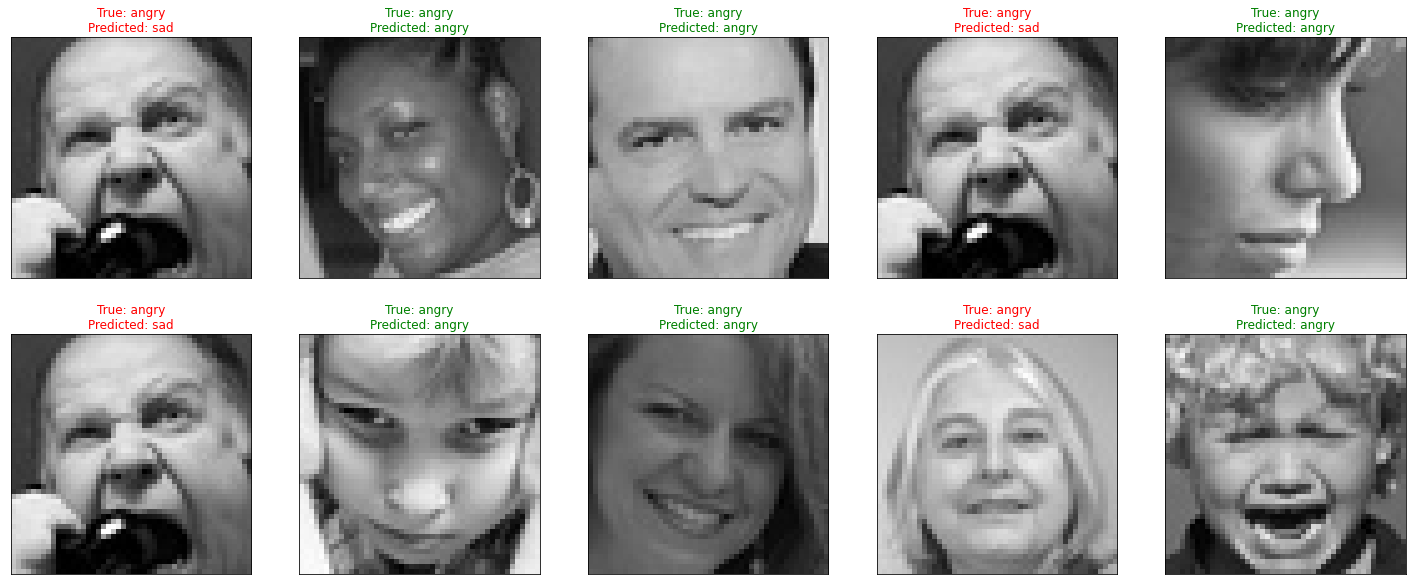

In [78]:
Random_batch = np.random.randint(0, len(validation_generator) - 1)
Random_Img_Index = np.random.randint(0, BATCH_SIZE - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = validation_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(validation_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if emotions[Random_Img_Label] == emotions[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {emotions[Random_Img_Label]}\nPredicted: {emotions[Model_Prediction]}", color=color)
plt.show()

In [48]:
def load_and_prep_image(filename, img_shape=48):
    img = cv2.imread(filename)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray_img, 1.1, 4)
    if len(faces) == 0:
        print("No faces detected")
        return None
    x, y, w, h = faces[0]
    face_img = gray_img[y:y+h, x:x+w]
    resized_img = cv2.resize(face_img, (img_shape, img_shape))
    normalized_img = resized_img / 255.
    return normalized_img

In [49]:
def pred_and_plot(filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(Random_Img, axis=0) , verbose=0)
    pClass = class_names[pred.argmax()]
    plt.title(f"Prediction: {pClass}")
    plt.axis(False);
    music_by_mood(pClass)

No faces detected


,name,artist,mood
0,Ты узнаешь её,КОРНИ,sad
1,Дождь,Батырхан Шукенов,sad
2,Эндорфин,Макс Корж,sad
3,Это любовь,Скриптонит,sad
4,Равнодушие,Мальбэк,sad


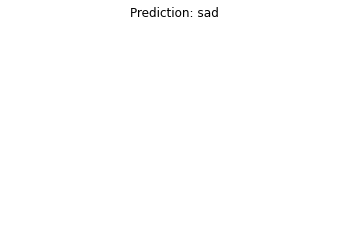

In [87]:
pred_and_plot('/content/drive/MyDrive/fer-2013/train/happy/Training_79496215.jpg', emotions)

In [50]:
model.save('final_model.h5')

In [ ]:
from google.colab import files
files.download("/content/final_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# WORK WITH OUR MUSIC DATASET
*At this stage of work, we are working with our created dataset of songs for every mood. We have distributed 50 songs for each mood that we use on this project*

In [51]:
music_df =pd.read_csv("/content/drive/MyDrive/music/music.csv")

music_df = music_df[['name','artist','mood']]
music_df.head()

,name,artist,mood
0,Timber,"Pitbull, Ke$ha",happy
1,SOFIA,ALVARO SOLER,happy
2,Watermelon Sugar,Harry Styles,happy
3,Happy,Pharrell Williams,happy
4,GANGNAM STYLE(강남스타일),PSY,happy


In [52]:
music_df["mood"].value_counts()

happy      50
sad        50
angry      50
neutral    50
Name: mood, dtype: int64

In [53]:
def music_by_mood(pClass):
    
    if( pClass == 'sad' ):

        music_mood = music_df[music_df['mood'] == 'sad']
        music_mood = music_mood[:5].reset_index(drop=True)
        display(music_mood)

    if( pClass == 'happy'):

        music_mood = music_df[music_df['mood'] == 'happy']
        music_mood = music_mood[:5].reset_index(drop=True)
        display(music_mood)

    if( pClass=='angry'):

        music_mood = music_df[music_df['mood'] == 'angry']
        music_mood = music_mood[:5].reset_index(drop=True)
        display(music_mood)
        
    if(pClass=='neutral' ):

        music_mood = music_df[music_df['mood'] == 'neutral']
        music_mood = music_mood[:5].reset_index(drop=True)
        display(music_mood)
    

**Real-time Emotion Detection **

In [54]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=c21e2a0afdb9b9cf03eef28f543ba042bbe3a842fcf930ed1bcc139a5c9980fb
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


In [55]:
import cv2
from deepface import DeepFace
from IPython.display import Image
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [56]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Take a photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


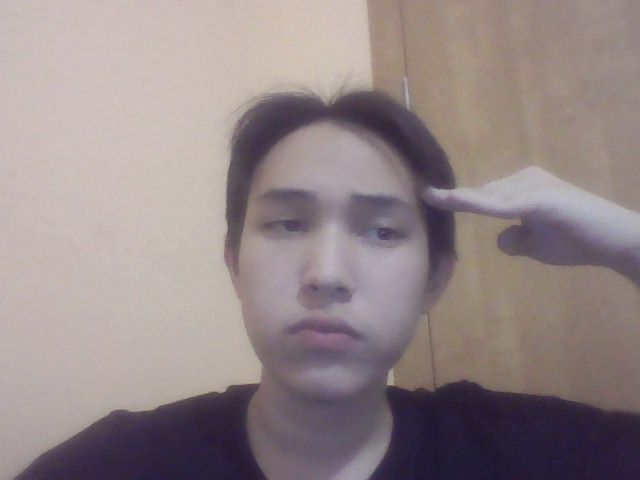

In [57]:
filename = take_photo()
print('Saved to {}'.format(filename))
display(Image(filename))

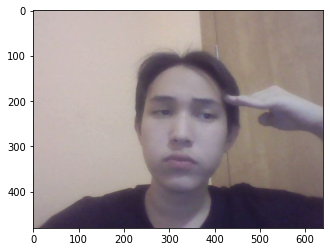

In [58]:
img = plt.imread(filename)
plt.imshow(img)

In [59]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.62MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:41<00:00, 12.8MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:20<00:00, 25.7MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:22<00:00, 24.4MB/s]
Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


In [60]:
predictions

[{'emotion': {'angry': 0.7047356106340885,
   'disgust': 7.025154218354146e-05,
   'fear': 1.7110498622059822,
   'happy': 1.1807603783609011e-05,
   'sad': 95.98339796066284,
   'surprise': 6.117831130580953e-07,
   'neutral': 1.600741222500801},
  'dominant_emotion': 'sad',
  'region': {'x': 207, 'y': 128, 'w': 244, 'h': 244},
  'age': 24,
  'gender': {'Woman': 0.5489954259246588, 'Man': 99.45100545883179},
  'dominant_gender': 'Man',
  'race': {'asian': 57.35262632369995,
   'indian': 8.105966448783875,
   'black': 2.110999822616577,
   'white': 11.106722801923752,
   'middle eastern': 3.338960185647011,
   'latino hispanic': 17.984719574451447},
  'dominant_race': 'asian'}]

In [61]:
print("Your mood is " + predictions[0]['dominant_emotion'])
print("We recommend you to listen: ")
predictions2 = music_by_mood(predictions[0]['dominant_emotion'])

Your mood is sad
We recommend you to listen: 


,name,artist,mood
0,Ты узнаешь её,КОРНИ,sad
1,Дождь,Батырхан Шукенов,sad
2,Эндорфин,Макс Корж,sad
3,Это любовь,Скриптонит,sad
4,Равнодушие,Мальбэк,sad
